In [1]:
from ROOT import TFile, TCanvas, gDirectory, TRatioPlot, gStyle, gPad, TLegend

Welcome to JupyROOT 6.26/08


In [2]:
path_vtxsigma = 'kinfit_etapipi_etato2gamma_run021142.root' # 1
path_no_vtxsigma = "../etapipi_etato2gamma_vertex_fit/kinfit_etapipi_etato2gamma_run021142.root" # 2
fl0 = TFile.Open(path_no_vtxsigma, 'read')
fl1 = TFile.Open(path_vtxsigma, 'read')

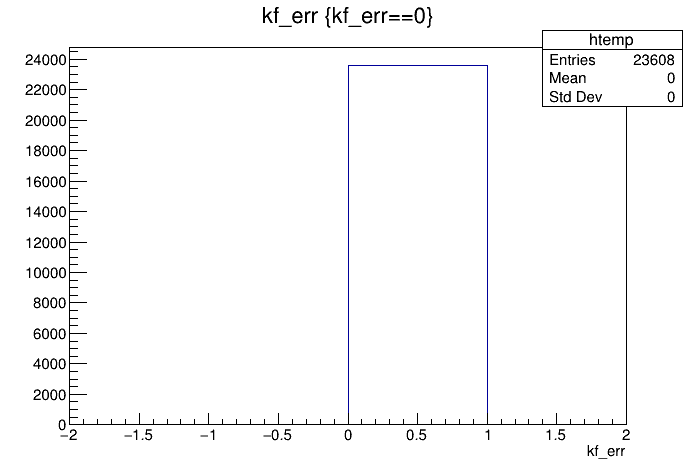

In [3]:
cnv = TCanvas()
fl0.kf_data.Draw("kf_err", "kf_err==0")
cnv.Draw()

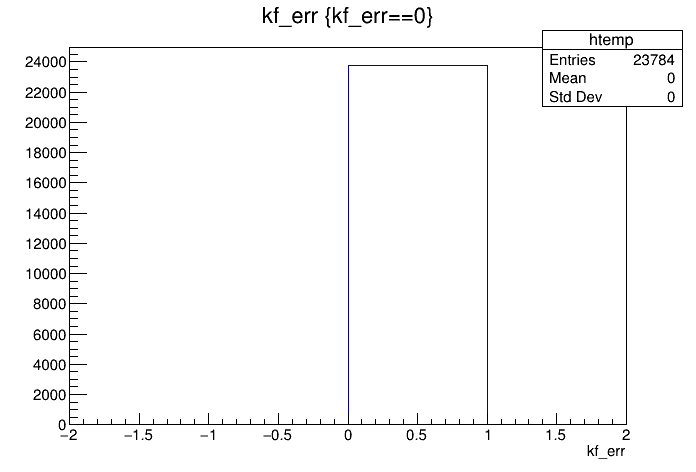

In [7]:
cnv = TCanvas()
fl1.kf_data.Draw("kf_err", "kf_err==0")
cnv.Draw()

 FCN=164.803 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=3.50465e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.82283e-01   1.00627e-02   6.31475e-05  -8.31997e-02


Info in <TCanvas::SaveAs>: ROOT file etapipi_vtxsigma_mgg_comp.root has been created


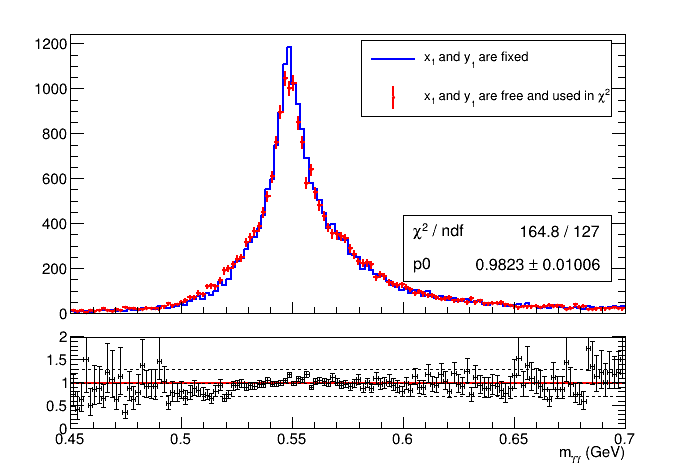

In [34]:
gStyle.SetOptFit(1);
cnv0 = TCanvas()
fl0.kf_data.Draw("kf_mgg>>kf_mgg0(128,0.45,0.7)", "kf_err==0", "goff")
h0 = gDirectory.Get("kf_mgg0")
h0.GetXaxis().SetTitle("m_{#gamma#gamma} (GeV)")
h0.SetTitle("")
h0.SetStats(False)
h0.SetLineColor(4)
h0.SetLineWidth(2)
fl1.kf_data.Draw("kf_mgg>>kf_mgg1(128,0.45,0.7)", "kf_err==0", "goff")
h1 = gDirectory.Get("kf_mgg1")
scale = h1.GetEntries() / h0.GetEntries()
h0.Scale(scale)
h1.SetTitle("")
h1.SetStats(False)
h1.SetLineColor(2)
# h1.SetLineStyle(9)
h1.SetLineWidth(2)
h1.SetMarkerStyle(20)
h1.SetMarkerSize(0.4)
h1.SetMarkerColor(2)
h1.Sumw2()
mks_ratio = TRatioPlot(h0, h1)
cnv0.SetTicks(0, 1)
mks_ratio.GetLowYaxis().SetNdivisions(505)
mks_ratio.Draw()
mks_ratio.GetLowerRefGraph().SetMaximum(2.0)
mks_ratio.GetLowerRefGraph().SetMinimum(0.0)
mks_ratio.GetLowerRefGraph().Fit("pol0")
gPad.Modified()
gPad.Update()
mks_ratio.GetUpperPad().cd()
st = mks_ratio.GetLowerRefGraph().FindObject("stats").Clone()
st.Draw()
mks_ratio.GetLowerRefGraph().SetStats(0)
st.SetX1NDC(0.58)
st.SetX2NDC(0.88)
st.SetY1NDC(0.15)
st.SetY2NDC(0.35)
leg = TLegend(0.52,0.65,0.88,0.88)
leg.AddEntry("kf_mgg0","x_{1} and y_{1} are fixed","l")
leg.AddEntry("kf_mgg1","x_{1} and y_{1} are free and used in #chi^{2}","ep")
leg.Draw()
cnv0.Draw()
cnv0.SaveAs("etapipi_vtxsigma_mgg_comp.root")